# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

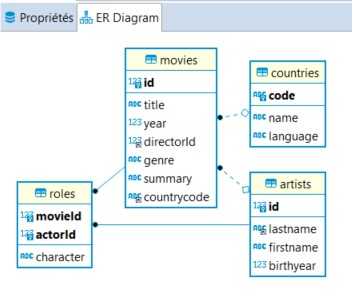

In [1]:
from IPython.display import Image
Image("diagram.jpg")

La base de donnée relationnellle s'appelle MOVIES, elle comporte 4 tables:
- movies: clé primaire: id, clés étrangères: directorId, countrycode
- countries: clé primaire: code
- roles: clés primaires: movieId, actorId
- artits: clé primaire: id

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [2]:
import os
import pandas as pd

In [3]:
from sqlalchemy import create_engine  # https://www.sqlalchemy.org/
import pymysql

In [4]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

# création de l'objet engine avec sqlalchemy et pymysql
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

In [5]:
print(user)

student


### Exemples

#### Tables de base

In [6]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [7]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [8]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [9]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [10]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [11]:
results.shape

(118, 4)

In [12]:
len(results)

118

### Questions

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [13]:
sql_query_01 = """
    SELECT id, title, genre
    FROM movies
    WHERE genre = 'Drame'
"""

results = pd.read_sql_query(sql_query_01, engine)
results.head(5)


,id,title,genre
0,28,Apocalypse Now,Drame
1,59,A History of Violence,Drame
2,116,Match point,Drame
3,142,Le Secret de Brokeback Mountain,Drame
4,145,Breaking the Waves,Drame


In [14]:
results.shape

(83, 3)

Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [15]:
sql_query_02 = """
    SELECT lastname, firstname, movieId, actorId, title, year
    FROM artists
    INNER JOIN roles ON artists.id = roles.actorId 
    INNER JOIN movies ON roles.movieId = movies.id
    WHERE lastname = 'Willis'
    ORDER BY `year` 
"""

results = pd.read_sql_query(sql_query_02, engine)
results.head(5)


,lastname,firstname,movieId,actorId,title,year
0,Willis,Bruce,562,62,Piège de cristal,1988
1,Willis,Bruce,1573,62,58 minutes pour vivre,1990
2,Willis,Bruce,680,62,Pulp Fiction,1994
3,Willis,Bruce,1572,62,Une Journée en enfer,1995
4,Willis,Bruce,1571,62,Die Hard 4 : Retour en enfer,2007


Q03: Qui est le réalisateur de Memento ?

In [16]:
sql_query_03 = """
    SELECT title, directorId, lastname, firstname
    FROM movies, artists
    WHERE movies.directorId = artists.id
    AND title = 'Memento'

"""

results = pd.read_sql_query(sql_query_03, engine)
results.head(5)

,title,directorId,lastname,firstname
0,Memento,525,Nolan,Christopher


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [17]:
sql_query_04 = """
    SELECT movieId, actorId, `character`, title, lastname, firstname
    FROM roles
    INNER JOIN movies ON roles.movieId = movies.id
    INNER JOIN artists ON roles.actorId = artists.id 
    WHERE `character` = 'Chewbacca'  
"""

results = pd.read_sql_query(sql_query_04, engine)
results.head(5)

,movieId,actorId,character,title,lastname,firstname
0,11,24343,Chewbacca,La Guerre des étoiles,Mayhew,Peter
1,1891,24343,Chewbacca,L'Empire contre-attaque,Mayhew,Peter
2,1892,24343,Chewbacca,Le Retour du Jedi,Mayhew,Peter
3,140607,24343,Chewbacca,Star Wars : Le Réveil de la Force,Mayhew,Peter
4,181808,1709041,Chewbacca,Star Wars : Les Derniers Jedi,Suotamo,Joonas


Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [18]:
sql_query_05 = """
    SELECT lastname, firstname, movieId, actorId, title, year, `character`
    FROM artists
    INNER JOIN roles ON artists.id = roles.actorId 
    INNER JOIN movies ON roles.movieId = movies.id
    WHERE lastname = 'Willis' AND `character` = "John McClane"
"""

results = pd.read_sql_query(sql_query_05, engine)
results.head(5)


,lastname,firstname,movieId,actorId,title,year,character
0,Willis,Bruce,562,62,Piège de cristal,1988,John McClane
1,Willis,Bruce,1571,62,Die Hard 4 : Retour en enfer,2007,John McClane
2,Willis,Bruce,1572,62,Une Journée en enfer,1995,John McClane
3,Willis,Bruce,1573,62,58 minutes pour vivre,1990,John McClane


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [19]:
sql_query_06 = """
    SELECT movies.id, title, lastname, firstname
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId 
    INNER JOIN artists ON roles.actorId = artists.id 
    where title = "Sueurs froides"
"""

results = pd.read_sql_query(sql_query_06, engine)
results.head(5)


,id,title,lastname,firstname
0,426,Sueurs froides,Stewart,James
1,426,Sueurs froides,Novak,Kim
2,426,Sueurs froides,Bel Geddes,Barbara


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Jonnhy Depp ?

In [20]:
sql_query_07 = """
    SELECT artists.id, artists.lastname, artists.firstname, roles.actorId, roles.character, roles.movieId, movies.title, movies.directorId, movies.id
    FROM roles 
    INNER JOIN artists ON artists.id=roles.actorId 
    INNER JOIN movies ON movies.id=roles.movieId OR movies.directorId=artists.id and artists.lastname="Burton"
    WHERE artists.lastname='Depp'
"""

results = pd.read_sql_query(sql_query_07, engine)
results.head(5)


,id,lastname,firstname,actorId,character,movieId,title,directorId,id
0,85,Depp,Johnny,85,Ichabod Crane,2668,"Sleepy Hollow, La Légende du cavalier sans tête",510,2668


Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [21]:
sql_query_08 = """
    SELECT directorId, lastname, firstname, title, `character`
    FROM movies
    INNER JOIN artists ON movies.directorId = artists.id 
    INNER JOIN roles ON movies.directorId = roles.actorId AND movies.id=roles.movieId 
    WHERE lastname = 'Allen' AND firstname = 'Woody'
"""

results = pd.read_sql_query(sql_query_08, engine)
results.head(5)


,directorId,lastname,firstname,title,character
0,1243,Allen,Woody,Scoop,Sid Waterman
1,1243,Allen,Woody,Manhattan,Isaac Davis
2,1243,Allen,Woody,Annie Hall,Alvy Singer
3,1243,Allen,Woody,Maris et femmes,Prof. Gabriel 'Gabe' Roth


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [22]:
sql_query_09 = """
    SELECT directorId, title, lastname, firstname, `character`
    FROM movies
    INNER JOIN artists ON movies.directorId = artists.id 
    INNER JOIN roles ON movies.Id = roles.movieId 
    WHERE movies.directorId = roles.actorId 
"""

results = pd.read_sql_query(sql_query_09, engine)
results.head(5)


,directorId,title,lastname,firstname,character
0,190,Impitoyable,Eastwood,Clint,Bill Munny
1,138,Reservoir Dogs,Tarantino,Quentin,Mr. Brown
2,1243,Scoop,Allen,Woody,Sid Waterman
3,138,Pulp Fiction,Tarantino,Quentin,Jimmie Dimmick
4,1243,Manhattan,Allen,Woody,Isaac Davis


Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [23]:
sql_query_10 = """
    select * 
    FROM movies  
    INNER JOIN artists ON movies.directorId = artists.id 
    WHERE firstname ="Quentin" AND lastname ="Tarantino"
    AND movies.directorId NOT IN (
    	SELECT actorId 
    	FROM roles 
    	WHERE movies.id=roles.movieId 
    	)
"""

results = pd.read_sql_query(sql_query_10, engine)
results.head(5)


,id,title,year,directorId,genre,summary,countrycode,id,lastname,firstname,birthyear
0,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US,138,Tarantino,Quentin,1963
1,184,Jackie Brown,1997,138,Crime,"Hôtesse de l'air, Jackie Brown arrondit ses fi...",US,138,Tarantino,Quentin,1963
2,393,Kill Bill : Volume 2,2004,138,Action,Après s'être débarrassée de ses anciennes coll...,US,138,Tarantino,Quentin,1963
3,16869,Inglourious Basterds,2009,138,Drame,"Dans la France occupée de 1941, Shosanna Dreyf...",DE,138,Tarantino,Quentin,1963
4,68718,Django Unchained,2012,138,Drame,"Dans le sud des États-Unis, deux ans avant la ...",US,138,Tarantino,Quentin,1963


Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

In [24]:
sql_query_11 = """
    SELECT directorId, title, lastname, firstname, `character`
    FROM movies
    INNER JOIN roles ON movies.directorId = roles.actorId  
    INNER JOIN artists ON roles.actorId = artists.id
"""

results = pd.read_sql_query(sql_query_11, engine)
results.head(5)


,directorId,title,lastname,firstname,character
0,138,Kill Bill : Volume 1,Tarantino,Quentin,Mr. Brown
1,138,Kill Bill : Volume 1,Tarantino,Quentin,Jimmie Dimmick
2,190,Impitoyable,Eastwood,Clint,Bill Munny
3,190,Impitoyable,Eastwood,Clint,Blondie
4,1243,Match point,Allen,Woody,Sid Waterman


Q12: Quels sont les films de Hitchcock sans James Stewart

In [30]:
sql_query_12 = """
    select * 
    FROM movies  
    INNER JOIN artists ON movies.directorId = artists.id 
    WHERE firstname ="Alfred" AND lastname ="Hitchcock"
    
"""

results = pd.read_sql_query(sql_query_12, engine)
results.head(5)


,id,title,year,directorId,genre,summary,countrycode,id,lastname,firstname,birthyear
0,213,La Mort aux trousses,1959,2636,Mystère,Le publiciste Roger Tornhill se retrouve par e...,US,2636,Hitchcock,Alfred,1899
1,223,Rebecca,1940,2636,Drame,"Mrs. Edythe Van Hopper, respectable veuve déjà...",US,2636,Hitchcock,Alfred,1899
2,303,Les Enchaînés,1946,2636,Thriller,"Alicia, fille d'un espion nazi, mène une vie d...",US,2636,Hitchcock,Alfred,1899
3,426,Sueurs froides,1958,2636,Mystère,"Scottie est sujet au vertige, ce qui lui porte...",US,2636,Hitchcock,Alfred,1899
4,539,Psychose,1960,2636,Horreur,Marion Crane en a assez de ne pouvoir mener sa...,US,2636,Hitchcock,Alfred,1899


Q13: Quel est la filmographie de James Stewart ?

In [26]:
sql_query_13 = """
    SELECT *
    FROM artists
    INNER JOIN roles ON artists.id = roles.actorId 
    INNER JOIN movies ON roles.movieId = movies.id 
    WHERE lastname = 'Stewart' AND firstname = 'James'
"""

results = pd.read_sql_query(sql_query_13, engine)
results.head(5)


,id,lastname,firstname,birthyear,movieId,actorId,character,id,title,year,directorId,genre,summary,countrycode
0,854,Stewart,James,1908,426,854,Det. John 'Scottie' Ferguson,426,Sueurs froides,1958,2636,Mystère,"Scottie est sujet au vertige, ce qui lui porte...",US
1,854,Stewart,James,1908,567,854,L.B. Jefferies,567,Fenêtre sur cour,1954,2636,Drame,"À cause d'une jambe cassée, le reporter-photog...",US
2,854,Stewart,James,1908,574,854,Dr. Ben McKenna,574,L'homme qui en savait trop,1956,2636,Aventure,En vacances au Maroc avec sa femme et son fils...,US


Q14: Quels sont les films sans rôle (acteurs) ?

In [ ]:
SELECT id 
FROM movies 
MINUS
select movies.id 
FROM roles
inner join movies on roles.movieId = movies.id 

Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

In [ ]:
sql_query_15 = """
    SELECT 
"""

results = pd.read_sql_query(sql_query_15, engine)
results.head(5)


Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [ ]:
sql_query_16 = """
    SELECT 
"""

results = pd.read_sql_query(sql_query_16, engine)
results.head(5)


Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

In [27]:
sql_query_17 = """
    Select movies.directorId, count(distinct movies.id) as nombre_de_film, artists.firstname, artists.lastname
    From movies 
    inner join artists ON movies.directorId = artists.id 
    Group by directorId 
    Having count(*)>=2
"""

results = pd.read_sql_query(sql_query_17, engine)
results.head(5)


,directorId,nombre_de_film,firstname,lastname
0,1,5,George,Lucas
1,42,2,Lars,von Trier
2,138,7,Quentin,Tarantino
3,201,2,Michel,Gondry
4,223,2,Alejandro,González Iñárritu


Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

In [ ]:
sql_query_18 = """
    SELECT 
"""

results = pd.read_sql_query(sql_query_18, engine)
results.head(5)


Q19: Quels sont les 10 pays produisant le plus de films ?

In [28]:
sql_query_19 = """
    SELECT COUNT(countrycode), name
    FROM movies
    INNER JOIN countries ON movies.countrycode = countries.code 
    GROUP BY code 
    ORDER BY COUNT(countrycode) DESC 
    LIMIT 10
"""
results = pd.read_sql_query(sql_query_19, engine)
results.head(5)

,COUNT(countrycode),name
0,131,Etats-Unis
1,39,France
2,21,Royaume-Uni
3,6,Canada
4,5,Allemagne


Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

In [29]:
sql_query_20 = """
    SELECT actorId, lastname, firstname, COUNT(actorID), countrycode 
    FROM artists
    INNER JOIN roles ON roles.actorId = artists.id 
    INNER JOIN movies ON roles.movieId = movies.id 
    Where countrycode = 'FR' 
    GROUP by actorId 
    Order by COUNT(actorId) DESC 
"""
results = pd.read_sql_query(sql_query_20, engine)
results.head(5)

,actorId,lastname,firstname,COUNT(actorID),countrycode
0,3784,Piccoli,Michel,3,FR
1,3829,Belmondo,Jean-Paul,3,FR
2,50,Deneuve,Catherine,3,FR
3,11546,Fresnay,Pierre,2,FR
4,17498,Arestrup,Niels,2,FR


---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)